# Домашнее задание 4.1

# 🥨👨🏻‍🍳🥐🥖

Тест с картинками оказался в итоге успешным, и теперь мы хотим усилить визуальный контент. Есть идея, что если мы сделаем не одну картинку, а еще и добавим видео производства наших изделий, то пользователь будет принимать решение о покупке охотнее и быстрее, и конверсия в заказ вырастет. 

__Продакт вернул нам такой дизайн эксперимента:__

*1. `Бизнес-проблема:`* мы считаем, что конверсии из визита в покупку в нашем магазине недостаточно высоки. Мы посмотрели на страницы конкурентов и поняли, что у нас есть возможность увеличить объем продаж, если мы еще немного изменим дизайн страницы с каталогом продукции. 

*2. `Гипотеза:`* предполагается, что добавление видео с процессом приготовления вкусностей мотивирует к их покупке и позволяет добиться двух эффектов:
   * повышение конверсии из визита в оплату (больше людей захотят купить нашу продукцию)
   * как минимум, не снижение среднего чека покупки, а в идеале — увеличение
    
*3. `Ожидаемые действия пользователей:`* мы ожидаем, что, увидев видео с процессом приготовления вкусностей вместе с описанием продукции, больше людей захотят сделать покупку, а возможно — в среднем будут покупать больше продукции в одном заказе.

*4. `Эксперимент будет считаться успешным, если:`*
   * конверсия из визита в покупку с окном в 7 дней повысится
   * средний чек покупки не снизится


## Что нужно сделать?

Проанализировать данные нового теста и дать свои комментарии о его успешности. Можно ли выкатывать изменение на всех пользователей?

1. Выбрать окно конверсии
2. Исследовать распределение пользователей по группам по основным сегментам
3. Оценить статистическую значимость в изменении конверсии с помощью критерия хи-квадрат
4. Вычислить мощность теста
5. Использовать бутстрап для оценки влияния теста на средний чек
6. Сделать вывод по результатам проведенного теста 

## Задание 1. Выбери окно конверсии, используя исторические данные 

**1. Прочитай файл investigate_window.csv.**
   - Запиши даннные в переменную `historical_data`
    
   - Отправь безымянную колонку с нумерацией в индекс с помощью аргумента функции `read_csv()`.
   
   - Проверь, какой тип данных в каждой колонке, и переведи столбцы с датами в формат даты. 

In [1]:
import pandas as pd

In [2]:
historical_data = pd.read_csv('investigate_window.csv')

In [3]:
historical_data.head()

,Unnamed: 0,user_id,main_page_viewed_at,order_completed_at,time_to_order
0,0,959238,2020-11-20 23:55:02.759000+00:00,2020-11-30 02:22:32.759000+00:00,9.102431
1,1,337366,2020-12-05 23:41:42.244000+00:00,2020-12-12 22:25:52.244000+00:00,6.947338
2,2,259956,2020-11-20 23:33:53.269000+00:00,2020-11-25 13:08:03.269000+00:00,4.565394
3,3,534280,2020-11-28 23:44:56.556000+00:00,2020-12-05 10:14:06.556000+00:00,6.436921
4,4,795121,2020-11-18 23:59:56.236000+00:00,2020-11-27 02:38:16.236000+00:00,8.109954


In [4]:
# Проверь, выводятся ли даты в формате datetime. Если нет — исправь это. 

historical_data.dtypes

Unnamed: 0               int64
user_id                  int64
main_page_viewed_at     object
order_completed_at      object
time_to_order          float64
dtype: object

In [5]:
historical_data['main_page_viewed_at']=pd.to_datetime(historical_data['main_page_viewed_at'])
historical_data['order_completed_at']=pd.to_datetime(historical_data['order_completed_at'])

**2. Вычисли 95, 90 и 85 перцентили для наших данных с помощью колонки time_to_order.**
   - Импортируй библиотеку `NumPy` и используй функцию перцентиля из нее.
   - Какой перцентиль соответствует недельному окну конверсии? 
   - Запиши это значение в отдельную переменную `perc_X`, где Х — это выбранный тобой процент, а значение переменной – значение перцентиля, т. е. количество дней, которое избирается в качестве окна конверсии. 
   - Округли значение до 1 знака после запятой.

In [6]:
import numpy as np

In [7]:
np.percentile(historical_data['time_to_order'], 95)

7.117476851851854

In [8]:
np.percentile(historical_data['time_to_order'], 90)

2.864949845679016

In [9]:
np.percentile(historical_data['time_to_order'], 85)

1.9903886959876524

In [10]:
perc_85 = round(np.percentile(historical_data['time_to_order'], 85), 1)

**3. Построй гистограмму распределения времени между первым заходом на сайт и покупкой.** 
   - Передай функции графика в аргумент данные о времени конверсии
   - Назови график и оси
   - Вертикальной пунктирной линией отметь значение выбранного тобой перцентиля. 
   - Выведи значение перцентиля в легенду. 
*Можешь использовать `seaborn` или `matplotlib`, как тебе удобнее.*

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

C:\Users\Xenia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


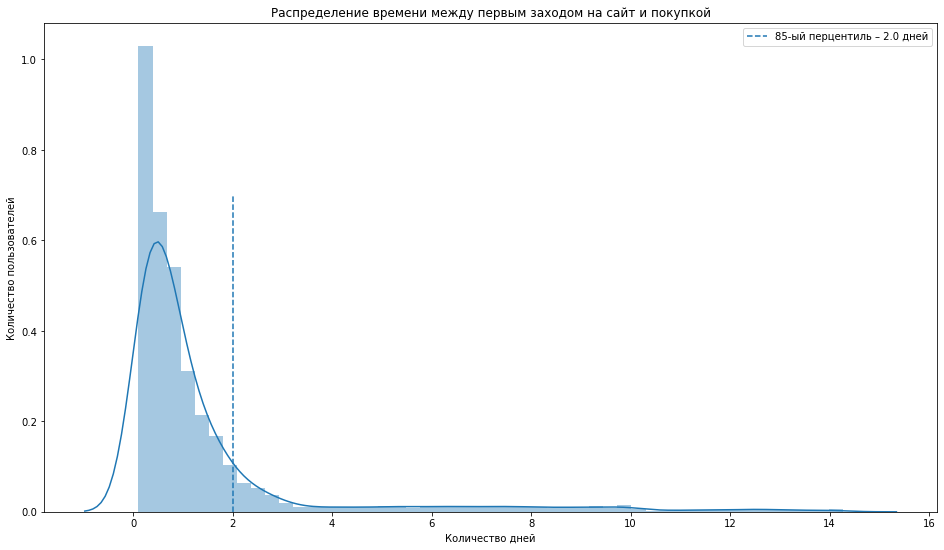

In [12]:
# напиши здесь код
plt.figure(figsize=(16,9))
sns.distplot(historical_data['time_to_order'])
plt.vlines(perc_85, ymin = 0, ymax = 0.7, linestyles = 'dashed', label = f'85-ый перцентиль – {perc_85} дней')
plt.title('Распределение времени между первым заходом на сайт и покупкой')
plt.xlabel('Количество дней')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

## Задание 2. Исследуй распределение пользователей по группам по основным сегментам 

**1. Прочитай файл bakery_ab_test.csv.**
   - Проверь, импортированы ли нужные тебе библиотеки.
   - Запиши данные в переменную `data`. 
   - Назначь индекс аналогично первому заданию.

In [13]:
# напиши здесь код
data = pd.read_csv('bakery_ab_test.csv') 
data

,Unnamed: 0,user_id,test_group,purchase_amount,geo_group,acquisition_channel,within_window,platform
0,1,3738,test,306.639511,regions,target_direct,1,pc
1,2,3755,control,NaN,regions,target_direct,0,pc
2,3,3772,test,NaN,regions,context_brand,0,mobile
3,4,3789,control,NaN,spb,target_direct,0,pc
4,5,3806,test,NaN,regions,social_media,0,pc
...,...,...,...,...,...,...,...,...
150478,152995,2604636,test,NaN,regions,target_direct,0,pc
150479,152996,2604653,control,5236.818309,regions,organic,1,mobile
150480,152997,2604670,control,NaN,regions,target_direct,0,pc
150481,152998,2604687,control,101.783032,regions,target_direct,1,pc


In [14]:
metrics = data.groupby('test_group', as_index= False).agg({'user_id': 'count', 'within_window': 'sum'})
metrics['conversion'] = round(metrics['within_window']/metrics['user_id']*100, 2)
metrics

,test_group,user_id,within_window,conversion
0,control,75210,22998,30.58
1,test,75273,24427,32.45


**2. Напиши функцию plot_segment_distribution, чтобы проверить распределение пользователей по сегментам внутри каждой группы.**
   - Аргументами функции должны быть данные теста, колонки с сегментами (маркетинг, гео и платформа), тест-фактор.
   - Для каждого сегмента в функции агрегируй данные, посчитав по для каждой группы и сегмента количество пользователей.
   - Сбрость индекс.
   - Добавь в функцию построение столбиковой диаграммы (bar chart).

In [15]:
# напиши здесь код
def plot_segments_distribution(df, segment_columns, test_factor):
    for segment in segment_columns:
        aggregated_data = df.groupby(by = [test_factor, segment])['user_id'].count().reset_index()
        sns.catplot(x = segment, 
                    y = 'user_id', 
                    hue = test_factor, # сообщаем, что хотим, чтобы разные группы имели разный цвет
                    data = aggregated_data, 
                    kind = "bar", 
                    height = 4, # задаем размер графика 
                    aspect = 1.5) # задаем ширину столбца
    

**3. Вызови функцию и посмотри на графики. Какой вывод о качестве сплитования ты можешь сделать?**
    — Передай списком столбцы, в которых обозначены сегменты пользователей, и отдельно столбец с тест-фактором.

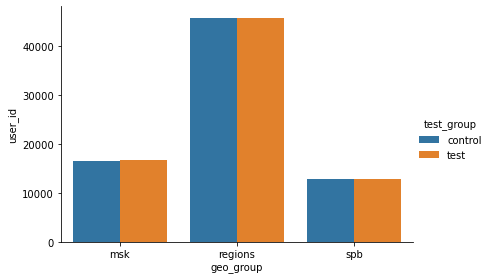

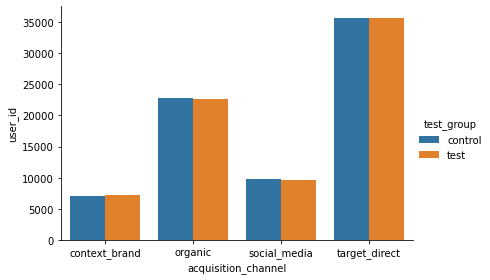

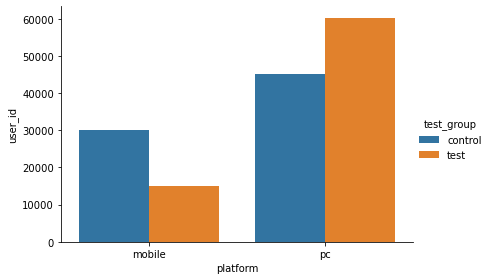

In [16]:
# напиши здесь код
plot_segments_distribution(data, #датафрейм
                           ["geo_group", "acquisition_channel","platform"], #сегменты
                           "test_group") #тест-фактор


## Задание 3. Используй критерий Хи-квадрат для конверсии


В прошлом задании ты, скорее всего, столкнулся с неравномерным распределением пользователей. Раньше мы просто перезапускали тест, чтобы собрать данные, но сейчас тест уже завершен, так что нам нужно анализировать те данные, которые есть. Мы не можем исправить данные, но можем проанализировать общие результаты и сравнить их с результатами для пользователей, зашедших с разных платформ, чтобы уменьшить риск принятия ошибочного решения. Поэтому дальше мы будем анализировать параллельно 3 теста:

1. Все пользователи, попавшие в тест
2. Пользователи, заходившие с ПК `platform = 'pc'`
3. Пользователи, заходившие с мобильного `platform = 'mobile'`

**Создай для каждой из 3 групп теста отдельную таблицу с метриками**
   - общее количество пользователей 
   - количество покупок в окне конверсии
   - средняя сумма покупки 
   - конверсия (количество покупок в окне конверсии / общее количество пользователей или среднее по полю `within_window`)
    
*Для фильтрации нужных пользователей можешь использовать* `loc[ ]`


In [17]:
metrics = data.groupby('test_group',as_index= False).agg({'user_id': 'count', 'within_window': 'sum','purchase_amount':'mean'})
metrics['conversion'] = metrics.within_window/metrics.user_id*100
metrics

,test_group,user_id,within_window,purchase_amount,conversion
0,control,75210,22998,5170.864335,30.578381
1,test,75273,24427,5394.771589,32.451211


In [18]:
metrics_pc = data.loc[data.platform =='pc'].groupby('test_group',as_index= False).agg({'user_id': 'count', 'within_window': 'sum','purchase_amount':'mean'})
metrics_pc['conversion'] = round(metrics['within_window']/metrics['user_id']*100, 2)
metrics_pc

,test_group,user_id,within_window,purchase_amount,conversion
0,control,45112,13732,5200.121803,30.58
1,test,60317,19659,5401.003720,32.45


In [19]:
metrics_mobile = data.loc[data.platform =='mobile'].groupby('test_group',as_index= False).agg({'user_id': 'count', 'within_window': 'sum','purchase_amount':'mean'})
metrics_mobile['conversion'] = round(metrics['within_window']/metrics['user_id']*100, 2)
metrics_mobile

,test_group,user_id,within_window,purchase_amount,conversion
0,control,30098,9266,5127.505438,30.58
1,test,14956,4768,5369.075812,32.45


**1. Вычисли** `p-value` **для каждой группы с помощью теста хи-квадрат**

   - Импортируй библиотеку `statsmodels` и используй функцию `proportions_chisquare` из нее
   - Результат работы функции `proportions_chisquare` присвой трем переменным для каждой группы


In [20]:
import statsmodels.stats.proportion as proportion

In [21]:
chi2stat, pval, table = proportion.proportions_chisquare(metrics['within_window'], metrics['user_id'])
chi2stat, pval, table

(61.137841436908104,
 5.321539863368111e-15,
 (array([[22998., 52212.],
         [24427., 50846.]]),
  array([[23702.57271585, 51507.42728415],
         [23722.42728415, 51550.57271585]])))

In [22]:
chi2stat_pc, pval_pc, table_pc = proportion.proportions_chisquare(metrics_pc['within_window'], metrics_pc['user_id'])
chi2stat_pc, pval_pc, table_pc

(55.28301795095328,
 1.0436637877855105e-13,
 (array([[13732., 31380.],
         [19659., 40658.]]),
  array([[14287.67029944, 30824.32970056],
         [19103.32970056, 41213.67029944]])))

In [23]:
chi2stat_mobile, pval_mobile, table_mobile = proportion.proportions_chisquare(metrics_mobile['within_window'], metrics_mobile['user_id'])
chi2stat_mobile, pval_mobile, table_mobile

(5.576527147023639,
 0.018202784051985058,
 (array([[ 9266., 20832.],
         [ 4768., 10188.]]),
  array([[ 9375.31255826, 20722.68744174],
         [ 4658.68744174, 10297.31255826]])))

**2. Введи в анализ уровень значимости в 5% с помощью переменной** `alpha`.


In [24]:
# напиши здесь код
alpha = 0.05
print(pval < alpha)

True


In [25]:
#Результат эксперимента можно считать статзначимым.Нулевая гипотеза подтвердилась

**3. Оставь комментарий, какой вывод о наличии статистически значимой в каждой группе разницы можно сделать? Что делаем с нулевой гипотезой?**

## Задание 4. Вычисли мощность теста

1. Импортируй объект `stats.power` из библиотеки `statsmodels`
2. Присвой функцию `GofChisquarePower()` из этой библиотеки в переменную `chipower` 
3. Реализуй функцию для подсчета `effect_size`

In [26]:
import statsmodels.stats.power as smp

In [27]:
# напиши здесь код
conversion_control = metrics['conversion'].values[0]/100 

#конверсия в тестовой группе
conversion_test = metrics['conversion'].values[1]/100

# в столбце 2 значения: кол-во наблюдений для каждой группы — возьмем то, что меньше
nobs = min(metrics['user_id'])

`effect_size` — это та самая наблюдаемая разница между двумя вариантами. Вычисляется следующим образом: 

$$ES = \sqrt{(p_0 - p_1)^2/p_o}$$

, где под $p_0$ можно понимать конверсию в контрольной группе, а $p_1$ — тестовой

In [28]:
def chi2_effect_size(p0, p1):
    return np.sqrt(((p0 - p1)**2 / p0))

4. Запиши значения конверсии в тестовой `conversion_test` и контрольной `conversion_control` группы в разные переменные
    - переведи серию в массив с помощью `.values[ ]`
    - раздели значения на 100, чтобы получить значения, а не %
    
    
5. Создай переменную nobs для количества наблюдений и запиши в нее значение меньшей группы

In [29]:
conversion_control=metrics['conversion'].values[0]/100
conversion_test=metrics['conversion'].values[1]/100
nobs=min(metrics['user_id'])

In [30]:
conversion_control_mobile = metrics_mobile['conversion'].values[0]/100
conversion_test_mobile = metrics_mobile['conversion'].values[1]/100
nobs_mobile = min(metrics_mobile['user_id'])

In [31]:
conversion_control_pc = metrics_pc['conversion'].values[0]/100
conversion_test_pc = metrics_pc['conversion'].values[1]/100 
nobs_pc =  min(metrics_pc['user_id'])

**6. Вызови функцию .solve_power и передай ей в аргументы** 
    - effect_size
    - количество наблюдений меньшей группы
    - значение p-value
    - мощности присвой значение None
    
**7. Сделай анализ мощности для каждого сегмента, для которого делали тест хи-квадрат.**

Оставь комментарий, как ты оцениваешь мощность этого теста? Можно ли на основе таких показателей делать выводы?


In [32]:
chipower = smp.GofChisquarePower()

In [33]:
power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control, conversion_test), 
                                               nobs = nobs, 
                                               alpha = pval, 
                                               power = None) 
power

0.9290939440556412

In [34]:
mobile_power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_mobile, conversion_test_mobile), 
                                               nobs = nobs, 
                                               alpha = pval, 
                                               power = None) 
mobile_power

0.9271367916086642

In [35]:
pc_power = mobile_power = chipower.solve_power(effect_size = chi2_effect_size(conversion_control_pc, conversion_test_pc), 
                                               nobs = nobs, 
                                               alpha = pval, 
                                               power = None) 
pc_power

0.9271367916086642

## Задание 5. Воспользуйся бутстрапом для оценки влияния теста на средний чек

**1. Сделай бутстрап среднего чека для тестовой и контрольной выборок, визуализируй результат. Какие выводы можно сделать?**
   - загрузи нужные модули из библиотеки `bootstrapped`
   - для сегментов, которые мы анализируем отдельно, создай переменную со значением среднего чека
   - чтобы убрать строки без покупок, используй `dropna()` и `.values`, чтобы перевести данные в формат массива

In [36]:
!pip install bootstrapped

In [37]:
# импортируем необходимые модули
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats
import bootstrapped.compare_functions as bs_compare
import numpy as np

In [38]:
test = data[data['test_group'] == 'test']['purchase_amount'].dropna().values
control = data[data['test_group'] == 'control']['purchase_amount'].dropna().values

test_pc = data[(data['test_group'] == 'test')&(data['platform'] == 'pc')]['purchase_amount'].dropna().values
control_pc = data[(data['test_group'] == 'control')&(data['platform'] == 'pc')]['purchase_amount'].dropna().values

test_mobile = data[(data['test_group'] == 'test')&(data['platform'] == 'mobile')]['purchase_amount'].dropna().values
control_mobile = data[(data['test_group'] == 'control')&(data['platform'] == 'mobile')]['purchase_amount'].dropna().values

**2. Вызови функцию `bootstrap_ab` для каждого сегмента, передай ей нужные аргументы**
   - `test = `
   - `ctrl = `
   - `stat_func = bs_stats.mean`
   - `compare_func = bs_compare.difference`
   - `return_distribution = True`

In [39]:
boot = bs.bootstrap_ab(test = test, ctrl = control
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)
boot

array([263.45238634, 148.74724628, 149.55160928, ..., 296.76661902,
       315.30822112, 162.85820066])

In [40]:
boot_pc = bs.bootstrap_ab(test = test_pc, ctrl = control_pc
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True)
boot_pc

array([187.08863728, 102.25525082, 263.04759461, ..., 188.9424444 ,
       273.18652183, 201.25465563])

In [41]:
boot_mobile = bs.bootstrap_ab(test = test_mobile, ctrl = control_mobile
                              , stat_func = bs_stats.mean
                              , compare_func = bs_compare.difference
                              , return_distribution=True) 
boot_mobile

array([261.55194195, 327.57352819, 177.7274306 , ..., 319.69815458,
       134.9771383 , 288.04031001])

**3. Задай размер доверительного интервала для каждого исследуемого сегмента 95% с помощью перцентилей**

In [42]:
borders = np.percentile(boot, [2.5, 97.5])
borders_pc = np.percentile(boot_pc, [2.5, 97.5])
borders_mobile = np.percentile(boot_mobile, [2.5, 97.5])

**4. Оцени, есть ли статистически значимое изменение по среднему чеку в каждом сегменте**

   - Построй гистограмму распределения значений среднего чека.
   - Выведи границы доверительного интервала линиями.
   - Выведи ноль красной линией.
   - Оставь комментарий, есть ли статистически значимое изменение по среднему чеку в каждом сегменте.
   

C:\Users\Xenia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


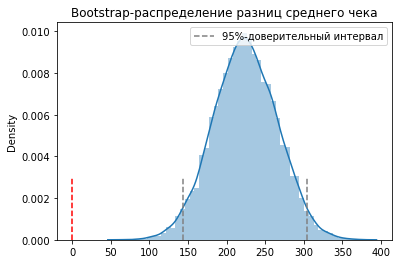

In [43]:
sns.distplot(boot) 
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, 
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders,
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

C:\Users\Xenia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


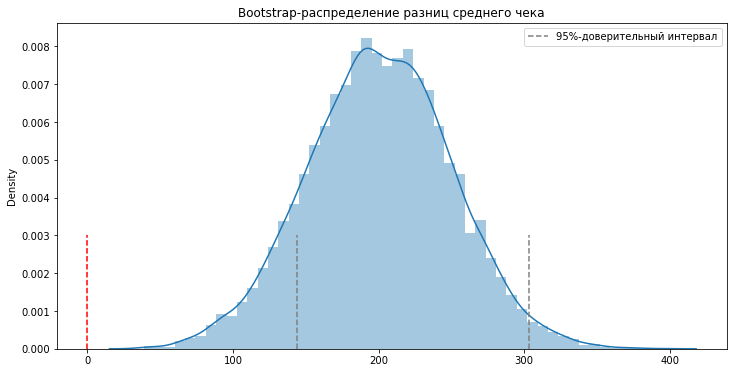

In [44]:
sns.distplot(boot_pc) 
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, 
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders,
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

In [45]:
#Да, внедрять изменения каталога нужно

C:\Users\Xenia\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


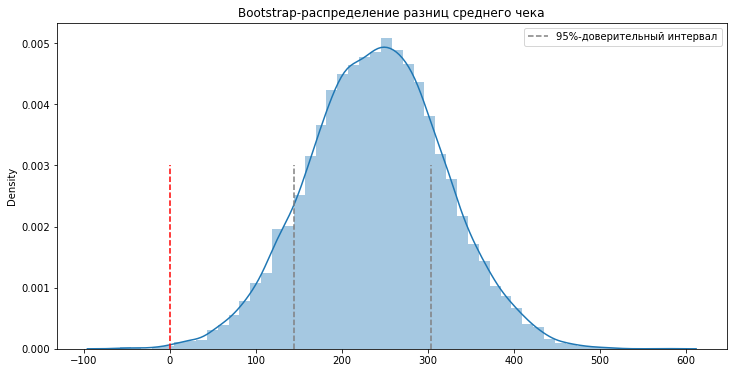

In [46]:
sns.distplot(boot_mobile) 
plt.title('Bootstrap-распределение разниц среднего чека')
plt.rcParams["figure.figsize"] = (12, 6)
plt.vlines(0, 
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'red')
plt.vlines(borders,
           ymin = 0, 
           ymax = 0.003, 
           linestyles= '--', 
           colors = 'grey', 
           label = '95%-доверительный интервал')
plt.legend()
plt.show()

## Задание 6. Сделай вывод по результатам проведенного теста (заданий 2–5)

Нужно ли внедрять изменение каталога? Почему?

# 🎉🎉🎉 Поздравляем, ты великолепен! 